In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def scale_array(Array, LowerBound, UpperBound):
    Array_scaled = LowerBound + (Array - np.min(Array)) * (UpperBound - LowerBound) / (np.max(Array) - np.min(Array))
    return Array_scaled

# First Graph (Gained by Professor)

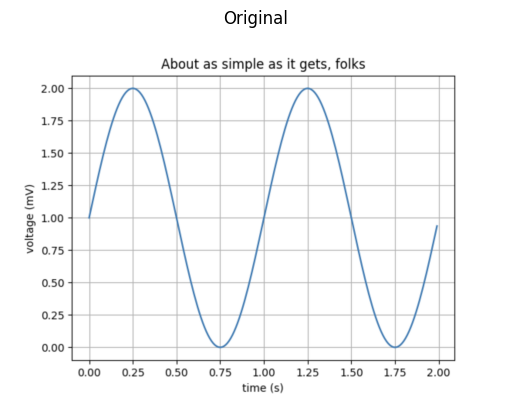

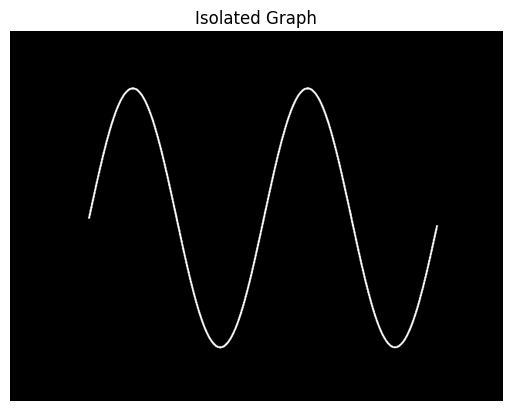

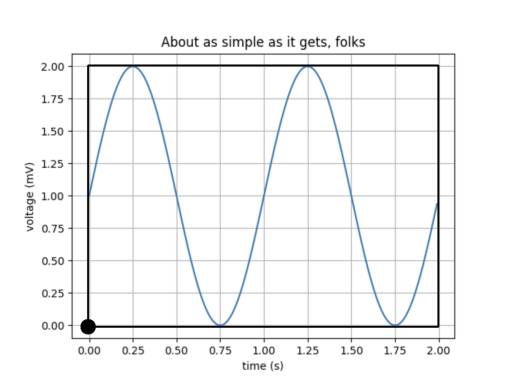

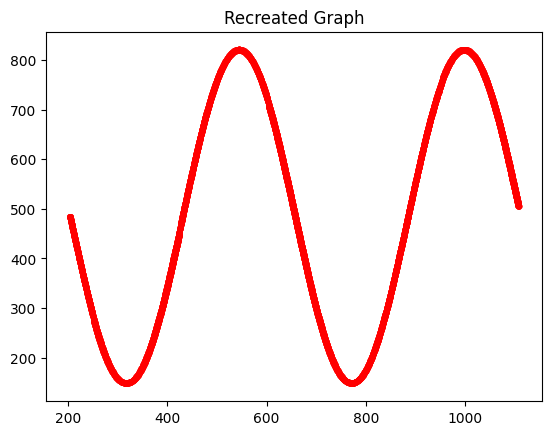

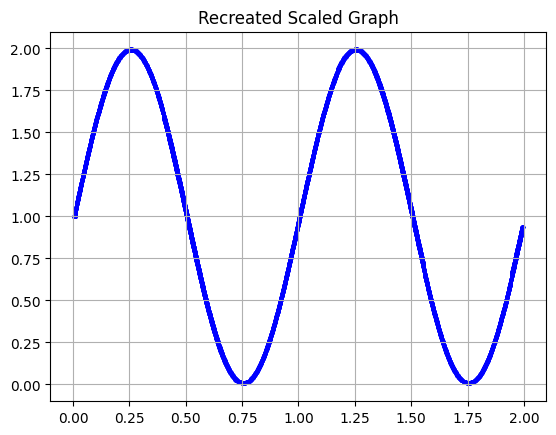

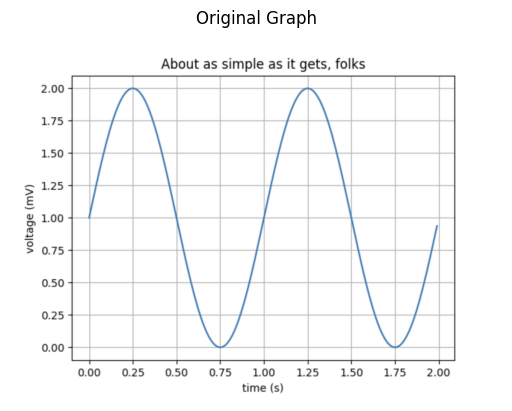

In [44]:
# Load the image
graph = cv.imread('/media/graph.png')

# Convert To RGB
graph = cv.cvtColor(graph, cv.COLOR_BGR2RGB)
plt.imshow(graph)
plt.axis('off')
plt.title('Original')
plt.show()

# Convert To HSV
graph_hsv = cv.cvtColor(graph, cv.COLOR_RGB2HSV)

# Thresholding for the graph line
lower_blue = np.array([100, 50, 50])  # Lower HSV bounds for blue
upper_blue = np.array([140, 255, 255])  # Upper HSV bounds for blue
graph_mask = cv.inRange(graph_hsv, lower_blue, upper_blue)
plt.imshow(graph_mask, cmap='gray')
plt.axis('off')
plt.title('Isolated Graph')
plt.show()

def bounding_rect(img):
    """
    Get the bounding rectangle of the largest contour in the image

    Args:
    img: image to get bounding rectangle from (numpy array, grayscale)

    Returns:
    rect: bounding rectangle of the largest contour (tuple, (x, y, w, h))
    """
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    rect = cv.boundingRect(contours[0])
    return rect
x, y, w, h = bounding_rect(graph_mask)

result_img = graph_hsv.copy()
cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 0), 3)
cv.circle(result_img, (x, y+h), 20, (0, 0, 0), -1)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.axis('off')
plt.show()


#Get Graph Coordinates
height, width = graph_mask.shape
graph_points = []

for x in range(width):
    for y in range(height):
        if graph_mask[y, x] > 200:
            graph_points.append((x, y))

graph_points = np.array(graph_points)

plt.figure
plt.scatter(graph_points[:,0], graph_points[:,1], color='red', s=5)
plt.title("Recreated Graph")
plt.show()


#Scale Graph To His Original Size
scaled_x = scale_array(graph_points[:,0], 0, 2)
scaled_y = scale_array(graph_points[:,1], 2, 0)

plt.figure
plt.scatter(scaled_x, scaled_y, color='blue', s=1)
plt.grid('on')
plt.title("Recreated Scaled Graph")
plt.show()

plt.figure
plt.imshow(graph)
plt.axis('off')
plt.title("Original Graph")
plt.show()


# Second Graph (Dotted Lines)

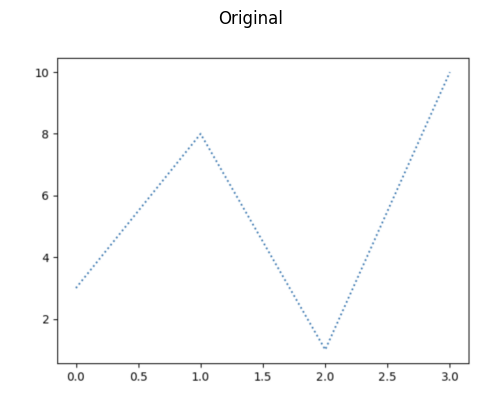

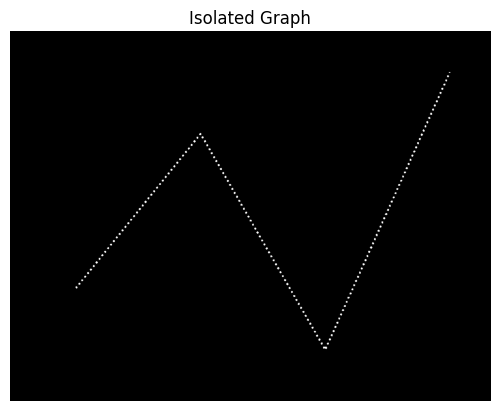

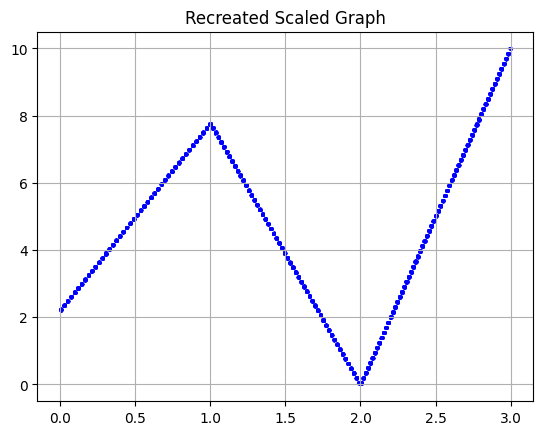

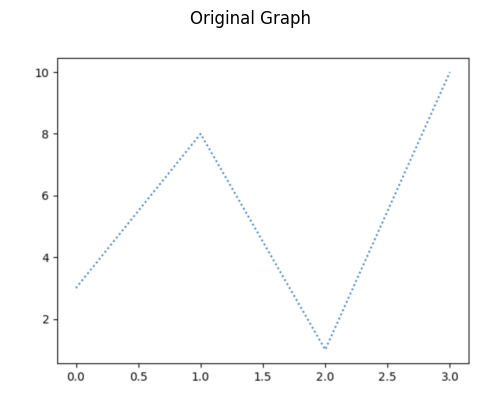

In [43]:
# Load the image
graph = cv.imread('/media/graph2.png')

# Convert To RGB
graph = cv.cvtColor(graph, cv.COLOR_BGR2RGB)
plt.imshow(graph)
plt.axis('off')
plt.title('Original')
plt.show()

# Convert To HSV
graph_hsv = cv.cvtColor(graph, cv.COLOR_RGB2HSV)

# Thresholding for the graph line
lower_blue = np.array([100, 50, 50])  # Lower HSV bounds for blue
upper_blue = np.array([140, 255, 255])  # Upper HSV bounds for blue
graph_mask = cv.inRange(graph_hsv, lower_blue, upper_blue)
plt.imshow(graph_mask, cmap='gray')
plt.axis('off')
plt.title('Isolated Graph')
plt.show()


#Get Graph Coordinates
height, width = graph_mask.shape

graph_points = []

for x in range(width):
    for y in range(height):
        if graph_mask[y, x] > 200:
            graph_points.append((x, y))

graph_points = np.array(graph_points)

#Scale Graph To His Original Size
scaled_x = scale_array(graph_points[:,0], 0, 3)
scaled_y = scale_array(graph_points[:,1], 10, 0)

plt.figure
plt.scatter(scaled_x, scaled_y, color='blue', s=1)
plt.grid('on')
plt.title("Recreated Scaled Graph")
plt.show()

plt.figure
plt.imshow(graph)
plt.axis('off')
plt.title("Original Graph")
plt.show()


# Third Graph (Dashed Line with Blue Dots)

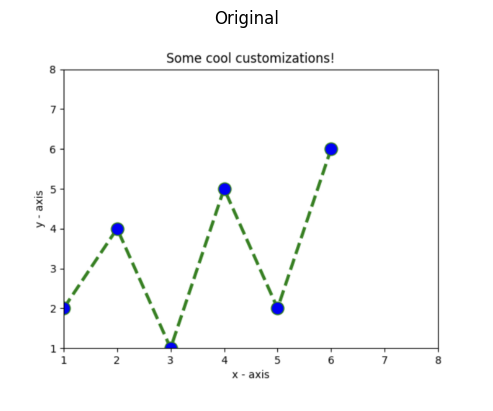

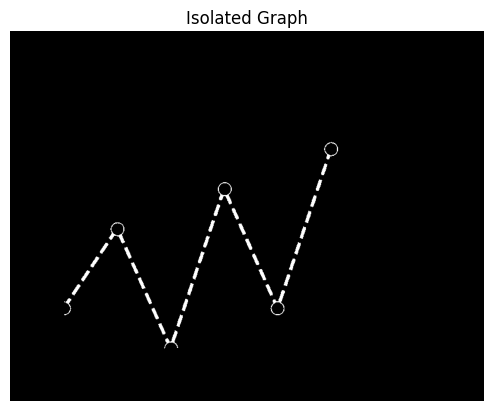

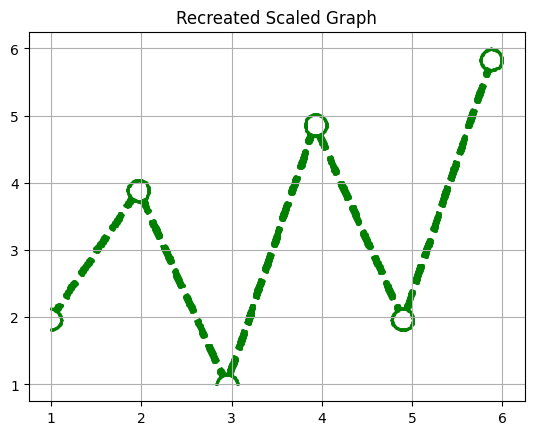

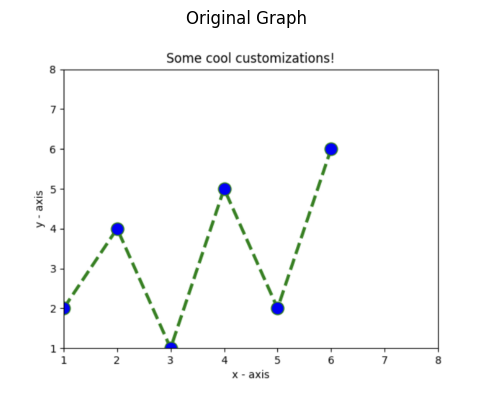

In [47]:
# Load the image
graph = cv.imread('/media/graph3.png')

# Convert To RGB
graph = cv.cvtColor(graph, cv.COLOR_BGR2RGB)
plt.imshow(graph)
plt.axis('off')
plt.title('Original')
plt.show()

# Convert To HSV
graph_hsv = cv.cvtColor(graph, cv.COLOR_RGB2HSV)

# Thresholding for the graph line
lower_green = np.array([35, 50, 50])  # Lower HSV bounds for green
upper_green = np.array([85, 255, 255])  # Upper HSV bounds for green
graph_mask = cv.inRange(graph_hsv, lower_green, upper_green)
plt.imshow(graph_mask, cmap='gray')
plt.axis('off')
plt.title('Isolated Graph')
plt.show()


#Get Graph Coordinates
height, width = graph_mask.shape

graph_points = []

for x in range(width):
    for y in range(height):
        if graph_mask[y, x] > 200:
            graph_points.append((x, y))


graph_points = np.array(graph_points)

#Scale Graph To His Original Size
scaled_x = scale_array(graph_points[:,0], 1, 6)
scaled_y = scale_array(graph_points[:,1], 6, 1)

plt.figure
plt.scatter(scaled_x, scaled_y, color='green', s=1)
plt.grid('on')
plt.title("Recreated Scaled Graph")
plt.show()

plt.figure
plt.imshow(graph)
plt.axis('off')
plt.title("Original Graph")
plt.show()


# Fourth Graph (Square Wave)

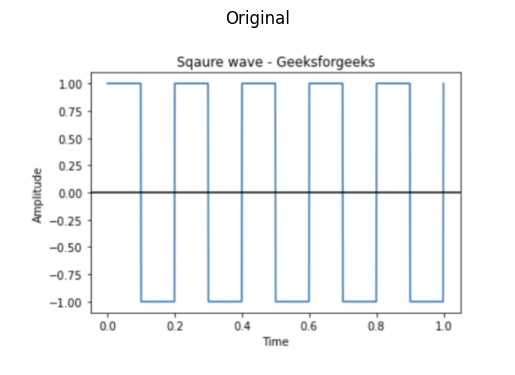

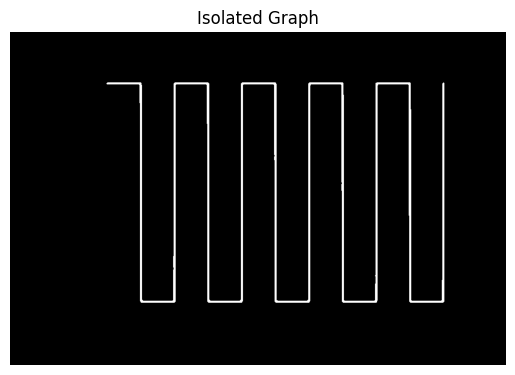

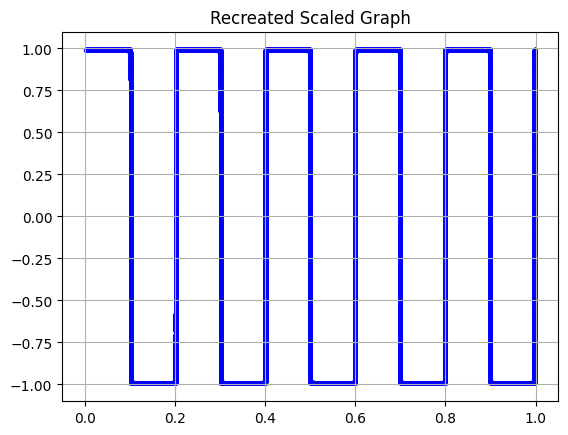

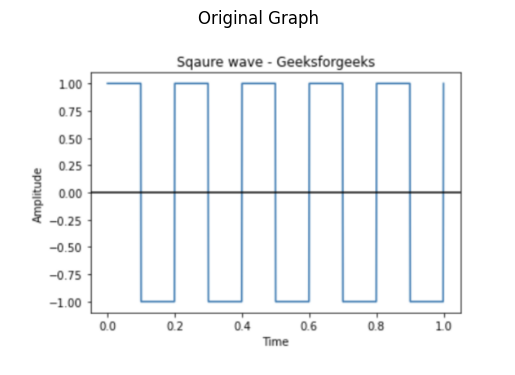

In [37]:
# Load the image
graph = cv.imread('/media/graph4.png')

# Convert To RGB
graph = cv.cvtColor(graph, cv.COLOR_BGR2RGB)
plt.imshow(graph)
plt.axis('off')
plt.title('Original')
plt.show()

# Convert To HSV
graph_hsv = cv.cvtColor(graph, cv.COLOR_RGB2HSV)

# Thresholding for the graph line
lower_blue = np.array([100, 50, 50])  # Lower HSV bounds for blue
upper_blue = np.array([140, 255, 255])  # Upper HSV bounds for blue
graph_mask = cv.inRange(graph_hsv, lower_blue, upper_blue)
plt.imshow(graph_mask, cmap='gray')
plt.axis('off')
plt.title('Isolated Graph')
plt.show()


#Get Graph Coordinates
height, width = graph_mask.shape

graph_points = []

for x in range(width):
    for y in range(height):
        if graph_mask[y, x] > 200:
            graph_points.append((x, y))

graph_points = np.array(graph_points)

#Scale Graph To His Original Size
scaled_x = scale_array(graph_points[:,0], 0, 1)
scaled_y = scale_array(graph_points[:,1], 1, -1)

plt.figure
plt.scatter(scaled_x, scaled_y, color='blue', s=1)
plt.grid('on')
plt.title("Recreated Scaled Graph")
plt.show()

plt.figure
plt.imshow(graph)
plt.axis('off')
plt.title("Original Graph")
plt.show()


# Fifth Graph (Two Lines with Different Colors)

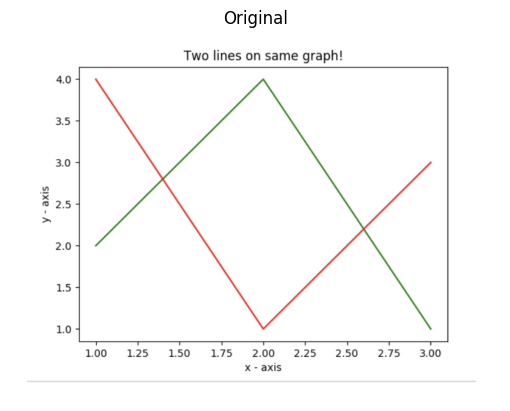

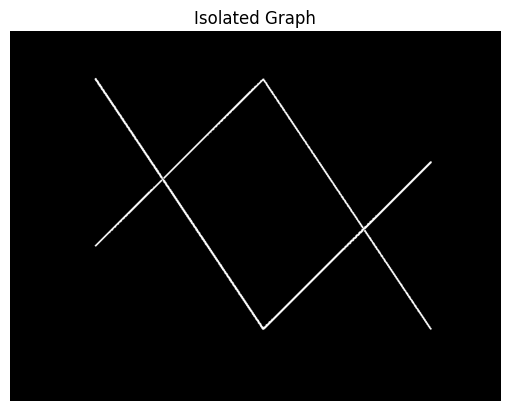

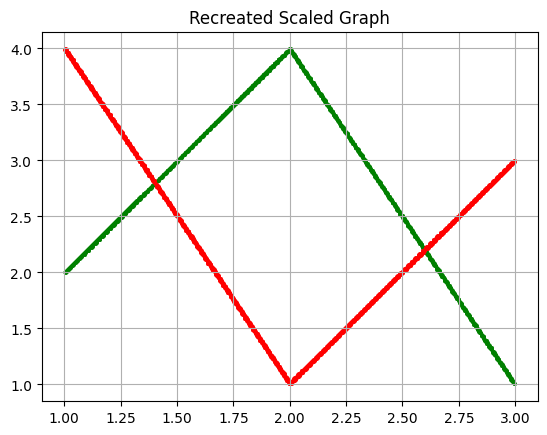

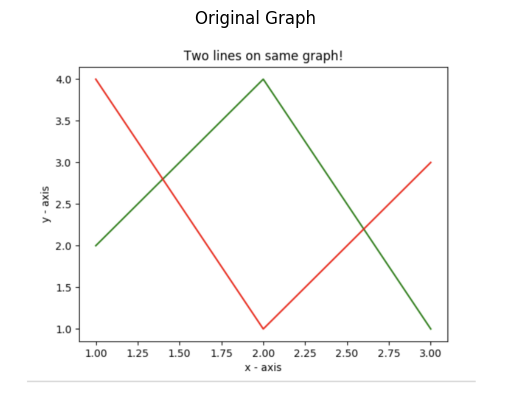

In [53]:
# Load the image
graph = cv.imread('/media/graph5.png')

# Convert To RGB
graph = cv.cvtColor(graph, cv.COLOR_BGR2RGB)
plt.imshow(graph)
plt.axis('off')
plt.title('Original')
plt.show()

# Convert To HSV
graph_hsv = cv.cvtColor(graph, cv.COLOR_RGB2HSV)

# Thresholding for the graph line
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

mask_green = cv.inRange(graph_hsv, lower_green, upper_green)
mask_red1 = cv.inRange(graph_hsv, lower_red1, upper_red1)
mask_red2 = cv.inRange(graph_hsv, lower_red2, upper_red2)
mask_red = mask_red1 | mask_red2

# Combine red and green masks
graph_mask = mask_green | mask_red
plt.imshow(graph_mask, cmap='gray')
plt.axis('off')
plt.title('Isolated Graph')
plt.show()


#Get Green Graph Coordinates
height, width = mask_green.shape

graph_points_green = []

for x in range(width):
    for y in range(height):
        if mask_green[y, x] > 200:
            graph_points_green.append((x, y))

graph_points_green = np.array(graph_points_green)

#Get Red Graph Coordinates
height, width = mask_red.shape

graph_points_red = []

for x in range(width):
    for y in range(height):
        if mask_red[y, x] > 200:
            graph_points_red.append((x, y))

graph_points_red = np.array(graph_points_red)


#Scale Graph To His Original Size
scaled_x_green = scale_array(graph_points_green[:,0], 1, 3)
scaled_y_green = scale_array(graph_points_green[:,1], 4, 1)
scaled_x_red = scale_array(graph_points_red[:,0], 1, 3)
scaled_y_red = scale_array(graph_points_red[:,1], 4, 1)

plt.figure
plt.scatter(scaled_x_green, scaled_y_green, color='green', s=1)
plt.scatter(scaled_x_red, scaled_y_red, color='red', s=1)
plt.grid('on')
plt.title("Recreated Scaled Graph")
plt.show()

plt.figure
plt.imshow(graph)
plt.axis('off')
plt.title("Original Graph")
plt.show()
